# Graph of Complex Roots of Polynomial Function
Graph of a function $f(x):\mathbb{R} \to \mathbb{R}$ can be drawn on a 2-dimensional coordinate.
This is true no matter what kind of function $f$ is.

Let's take a look at polynomial functions.
First let's draw a graph of function $f(x) = x^2 - 1$, and a graph of function $g(x) = x^2 + 1$.


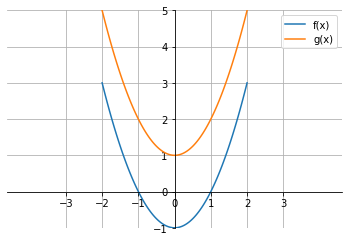

In [2]:
from matplotlib import pyplot as plt
import numpy as np

def my_plot_2(axis=None):
    plt.axis('equal')
    if axis:
        plt.xticks([t for t in range(int(axis[0]), int(axis[1]) + 1)])
        plt.yticks([t for t in range(int(axis[2]), int(axis[3]) + 1)])
        plt.axis(axis)
    plt.grid(True)
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    

x = np.array(np.linspace(-2.0, 2.0, 100))

my_plot_2(axis=[-3.0, 3.0, -1.0, 5.0])
fx = x * x - 1
plt.plot(x, fx)

gx = x * x + 1
plt.plot(x, gx)

plt.legend(['f(x)', 'g(x)'])
plt.show()


# Observation

It's clear that the solution of $f(x)=0$ is $x=\pm 1$. Therefore $(-1, 0)$ and $(1, 0)$ are the two points at which the curve of $f(x)$ intersects with axis $x$. There are no intersections between the curve of $g(x)$ and axis $x$, which indicates that equation $g(x)=0$ has no real number solution.

But we know that polynomial functions of order $n$ has exactly $n$ complex number roots. How can we visualize non-real-number roots of $x^2+1=0$?

Let's first try the complex version of $f(x)$: drawing a graph of function $h(x)=x^2-1$, where $x \in \mathbb{C}$. So $h: \mathbb{C}\to \mathbb{C}$ is a complex version of $g$.
We use the real part of independent variable $x$ as axis $x$, and the imaginary part of $x$ as axis $y$, to draw the real part of function $h$ as $h_r$ on axis $z$, i.e.
$$
h_r(x_r, x_i) = \Re(x ^ 2 - 1) = \Re(x_r^2 + 2x_r x_i i- x_i^2 - 1) = x_r^2 - x_i^2 - 1
$$
and similarly, draw image part of function $h$ as $h_i$:
$$
h_i(x_r, x_i) = \Im(x ^ 2 - 1) = \Im(x_r^2 + 2x_r x_i i- x_i^2 - 1) = 2x_r x_i
$$


In [42]:
x_r, x_i = np.meshgrid(np.arange(-2.0, 2.0, 0.05), np.arange(-2.0, 2.0, 0.05))
h_r = x_r * x_r - x_i * x_i - 1
h_i = 2 * x_r * x_i

import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Surface(x=x_r, y=x_i, z=h_r)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(autosize=False,
                  scene_camera_eye=dict(x=1.25, y=1.75, z=1.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.5),
                  width=500, height=500,
                  scene={ 'xaxis': { 'title': 'x_r'}, 'yaxis': { 'title': 'x_i' }, 'zaxis': { 'title': 'h_r' } }
                  )
fig.show()

fig = go.Figure(data=[go.Surface(x=x_r, y=x_i, z=h_i)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(autosize=False,
                  scene_camera_eye=dict(x=0.75, y=2.5, z=1.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.5),
                  width=500, height=500,
                  scene={ 'xaxis': { 'title': 'x_r'}, 'yaxis': { 'title': 'x_i' }, 'zaxis': { 'title': 'h_i' } }
                  )
fig.show()

# Observation of Complex Function Graphs

![plot of h_r](imgs/function_image/plot_h_r.png)
![plot of h_i](imgs/function_image/plot_h_i.png)

We can see that the graph of $h_r(x_r, x_i)$ is a surface, whose intersection with plane $z=0$ is a pair of hyperbolic curves. And the graph of $h_i(x_r, x_i)$ is a surface, whose intersection with plane $z=0$ is also a pair of hyperbolic curves with different direction. The two intersection points of the hyperbolic curves are the roots of equation $h(x)=0$.

Let's find the equation of those two pairs of hyperbolic curves:
$$
\begin{aligned}
& x_r^2-x_i^2-1=0 \\
& x_i = \pm \sqrt{x_r^2-1}
\end{aligned}
$$

and

$$
\begin{aligned}
& 2x_r x_i=0 \\
& x_i = 0 \quad \text{or} \quad x_r = 0
\end{aligned}
$$

The graph of these curves are as follows.

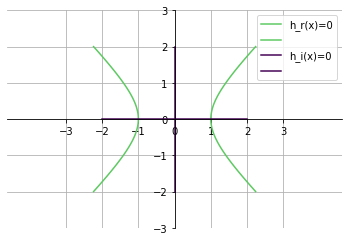

In [62]:
x_i = np.array(np.linspace(-2.0, 2.0, 100))

my_plot_2(axis=[-3.0, 3.0, -3.0, 3.0])
x_r = np.sqrt(x_i * x_i + 1)
plt.plot(x_r, x_i, color=plt.get_cmap()(0.75))
plt.plot(-x_r, x_i, color=plt.get_cmap()(0.75))

lin = np.array(np.linspace(-2.0, 2.0, 2))
zer = np.array([0.0, 0.0])
x_i = np.array(np.linspace(-2.0, 2.0, 100))
plt.plot(lin, zer, color=plt.get_cmap()(0.0))
plt.plot(zer, lin, color=plt.get_cmap()(0.0))

plt.legend(['h_r(x)=0', '', 'h_i(x)=0', ''])
plt.show()

# Roots are Intersections of the Two Curves

We know that $h(x) = 0$ if and only if $h_r(x) = 0$ and $h_i(x) = 0$. Therefore, their intersection points of $h_r(x) = 0$ and $h_i(x) = 0$ are the roots of function $h(x)=0$:
$$
x_r = 1, x_i = 0 \quad \Rightarrow \quad x = 1
$$
and 
$$
x_r = -1, x_i = 0 \quad \Rightarrow \quad x = -1
$$

Similarly, for function $l(x)=x^2+1$, we can draw the real and imaginary parts of $l(x)$:

In [63]:
x_r, x_i = np.meshgrid(np.arange(-2.0, 2.0, 0.05), np.arange(-2.0, 2.0, 0.05))
l_r = x_r * x_r - x_i * x_i + 1
l_i = 2 * x_r * x_i

fig = go.Figure(data=[go.Surface(x=x_r, y=x_i, z=l_r)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(autosize=False,
                  scene_camera_eye=dict(x=1.25, y=1.75, z=1.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.5),
                  width=500, height=500,
                  scene={ 'xaxis': { 'title': 'x_r'}, 'yaxis': { 'title': 'x_i' }, 'zaxis': { 'title': 'l_r' } }
                  )
fig.show()

fig = go.Figure(data=[go.Surface(x=x_r, y=x_i, z=l_i)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(autosize=False,
                  scene_camera_eye=dict(x=0.75, y=2.5, z=1.25),
                  scene_camera_center=dict(x=0, y=0, z=-0.5),
                  width=500, height=500,
                  scene={ 'xaxis': { 'title': 'x_r'}, 'yaxis': { 'title': 'x_i' }, 'zaxis': { 'title': 'l_i' } }
                  )
fig.show()

#

![plot of l_r](imgs/function_image/plot_l_r.png)
![plot of l_i](imgs/function_image/plot_l_i.png)

Similarly, the equation of those two pairs of hyperbolic curves:
$$
\begin{aligned}
& x_r^2-x_i^2+1=0 \\
& x_i = \pm \sqrt{x_r^2+1}
\end{aligned}
$$

and

$$
\begin{aligned}
& 2x_r x_i=0 \\
& x_i = 0 \quad \text{or} \quad x_r = 0
\end{aligned}
$$

The graph of these curves are as follows.

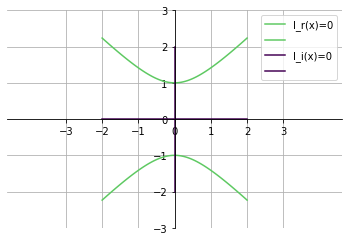

In [65]:
x_r = np.array(np.linspace(-2.0, 2.0, 100))

my_plot_2(axis=[-3.0, 3.0, -3.0, 3.0])
x_i = np.sqrt(x_r * x_r + 1)
plt.plot(x_r, x_i, color=plt.get_cmap()(0.75))
plt.plot(x_r, -x_i, color=plt.get_cmap()(0.75))

lin = np.array(np.linspace(-2.0, 2.0, 2))
zer = np.array([0.0, 0.0])
x_i = np.array(np.linspace(-2.0, 2.0, 100))
plt.plot(lin, zer, color=plt.get_cmap()(0.0))
plt.plot(zer, lin, color=plt.get_cmap()(0.0))

plt.legend(['l_r(x)=0', '', 'l_i(x)=0', ''])
plt.show()

# Complex Roots of Equation

The intersection points of $l_r(x) = 0$ and $l_i(x) = 0$ are the roots of function $l(x)=0$:
$$
x_r = 0, x_i = 1 \quad \Rightarrow \quad x = i
$$
and 
$$
x_r = 0, x_i = -1 \quad \Rightarrow \quad x = -i
$$

# Conclusion

The $n$ roots of a $n$-ordered polynominal function $f(x)$ are the $n$ intersection points of two $n$-ordered curves:
 - the intersection curve of plane $z=0$ and the surface representing the real part of $f(x)$,
 - the intersection curve of plane $z=0$ and the surface representing the imaginary part of $f(x)$.
